In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

from utils import laplacian

import matplotlib.pyplot as plt

from utils.rooms import setup1

import scipy.sparse as sps
from scipy.sparse import linalg 

In [2]:
nx = ny = 41
dx = 1. / (nx-1)

print(dx)

xar = np.linspace(0, 1, nx)
xg, yg = np.meshgrid(xar, xar)

extent = [0, xar.max(), 0, xar.max()]

rho_0, mask, exit_mask = setup1(xg, yg)

0.025


In [3]:
nx*ny

1681

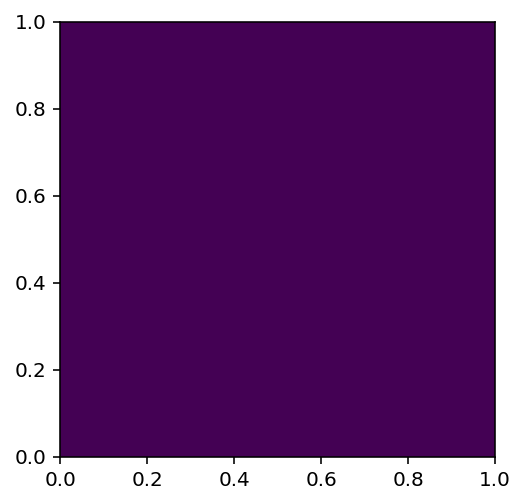

In [4]:
mask = np.zeros((nx, ny), dtype=bool)
#mask[:, 0] = True
#mask[0, :] = True

plt.imshow(mask, origin='lower', extent=extent)

In [6]:
dt = .4*dx ** 2
diff_coe = 2.
mat = diff_coe * dt * laplacian.noflux_laplacian_2d(mask, dx, dx)
mat_rshpd = mat.reshape((nx*nx, 5))

In [7]:
mat[0, 0]

array([-3.2,  0.8,  0.8,  0.8,  0.8])

In [14]:
# sparsify
offsets = [0, -1, -2, 1, 2]

In [15]:
offsets

[0, -1, -2, 1, 2]

In [16]:
mat_sparse = sps.spdiags(mat_rshpd.T, offsets, nx*nx, nx*nx)

In [18]:
mat_sparse.data

array([[-3.2, -3.2, -3.2, ..., -3.2, -3.2, -3.2],
       [ 0.8,  0.8,  0.8, ...,  0.8,  0.8,  0.8],
       [ 0.8,  0.8,  0.8, ...,  0.8,  0.8,  0.8],
       [ 0.8,  0.8,  0.8, ...,  0.8,  0.8,  0.8],
       [ 0.8,  0.8,  0.8, ...,  0.8,  0.8,  0.8]])

In [17]:
mat_sparse.toarray()[:9,:9]

array([[-3.2,  0.8,  0.8,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.8, -3.2,  0.8,  0.8,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.8,  0.8, -3.2,  0.8,  0.8,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0.8,  0.8, -3.2,  0.8,  0.8,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0.8,  0.8, -3.2,  0.8,  0.8,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0.8,  0.8, -3.2,  0.8,  0.8,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0.8,  0.8, -3.2,  0.8,  0.8],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0.8,  0.8, -3.2,  0.8],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.8,  0.8, -3.2]])

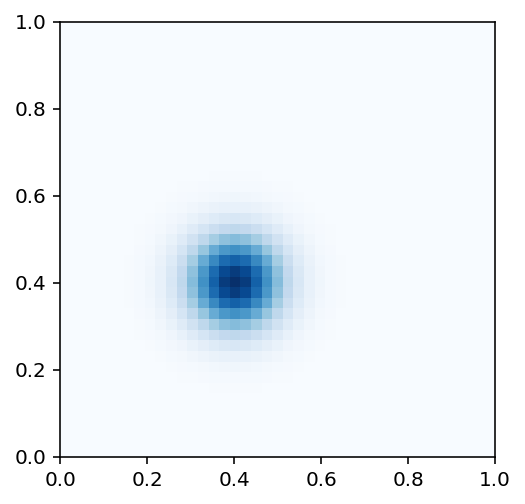

In [143]:
initial_distrib = (np.exp(-((xg-.4)**2 + (yg-.4)**2)/.012)
                  )
initial_distrib /= initial_distrib.sum()

from utils.plotting import plot_domain, send_zero_transparent

plt.imshow(initial_distrib, cmap=plt.cm.Blues, extent=extent, origin='lower')


initial_distrib_flat = initial_distrib.ravel()

In [144]:
res_ = [initial_distrib_flat]

for _ in range(10):
    A_ = sps.eye(nx*nx) - 0.5 * mat_sparse
    next_iter = linalg.spsolve(A_, res_[-1])
    res_.append(next_iter)

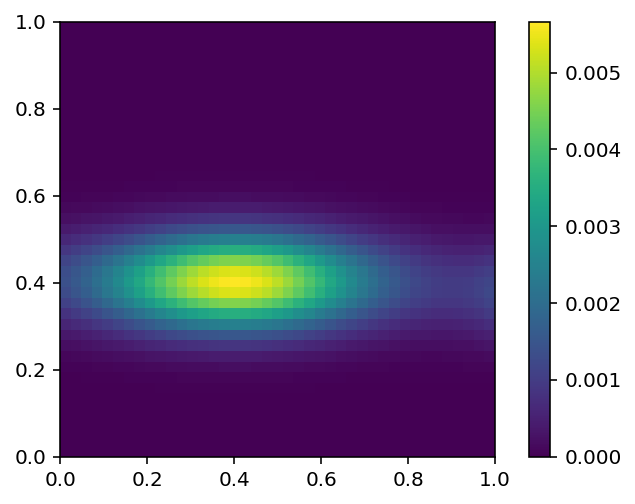

In [146]:
plt.imshow(res_[-1].reshape(nx,nx), extent=extent, origin='lower')

plt.colorbar()

In [147]:
res_[-1].sum()

0.9999999864080453